In [14]:
import numpy as np
import keras
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [16]:
! wget http://bit.do/deepcheetah

--2018-03-10 12:03:42--  http://bit.do/deepcheetah
Resolving bit.do (bit.do)... 54.83.52.76
Connecting to bit.do (bit.do)|54.83.52.76|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/7vcfe84wv8911uj/cheetah.jpg [following]
--2018-03-10 12:03:44--  https://www.dropbox.com/s/7vcfe84wv8911uj/cheetah.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/STe66vx1aVKrJsbPbnZshonRCjxoBpdJYD2fGG9FAK5kVZPivM86dyiV1LETncv3/file [following]
--2018-03-10 12:03:44--  https://dl.dropboxusercontent.com/content_link/STe66vx1aVKrJsbPbnZshonRCjxoBpdJYD2fGG9FAK5kVZPivM86dyiV1LETncv3/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.6.6, 2620:100:601c:6::a27d:606
Connecting to dl.dropboxuserc

In [17]:
! mv deepcheetah cheetah.jpg

In [18]:
cheetah = imageio.imread('cheetah.jpg')

In [19]:
cheetah.shape

(426, 640, 3)

In [20]:
model1 = Sequential()
model1.add(Conv2D(1, (4,4), input_shape=cheetah.shape, padding="same"))

In [21]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 426, 640, 1)       49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [32]:
from helpers import visualise_conv

(426, 640, 3)
(426, 640)


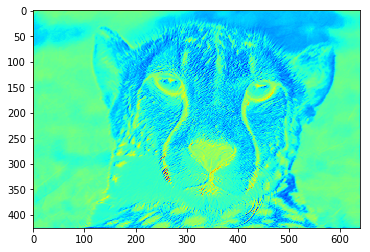

In [33]:
visualise_conv(cheetah, model1)

# With Convolution + Activation

In [34]:
from keras.layers import Activation

In [35]:
model2 = Sequential()
model2.add(Conv2D(1, (2,2), padding="same", input_shape=cheetah.shape))
model2.add(Activation("relu"))

(426, 640, 3)
(426, 640)


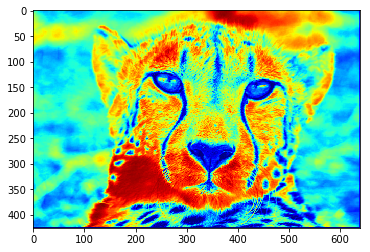

In [36]:
visualise_conv(cheetah, model2)

In [39]:
model3 = Sequential()
model3.add(Conv2D(1, (2,2), padding="same", input_shape=cheetah.shape))
model2.add(Activation("relu"))
model3.add(MaxPool2D(pool_size=(16,16)))

(426, 640, 3)
(26, 40)


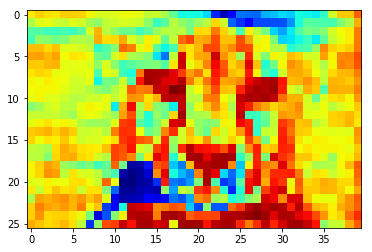

In [40]:
visualise_conv(cheetah, model3)

# Build a CNN

In [41]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [42]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Step 1: Prepare images and labels

In [43]:
from keras import backend as K

In [44]:
K.image_data_format()

'channels_last'

In [46]:
x_train_conv = x_train.reshape(x_train.shape[0],  28, 28, 1)    # 1 ->  channel 
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train_conv.shape, x_test_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [48]:
# Normalize
x_train_conv = x_train_conv/255
x_test_conv = x_test_conv/255

In [49]:
# convert class vector to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

## Step 2: Model - Convolution + Max pooling + Dropouts

In [53]:
model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model4.add(Conv2D(64, (3,3), activation="relu"))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0,25))
model4.add(Flatten())
model4.add(Dense(128, activation="relu"))
model4.add(Dropout(0,25))
model4.add(Dense(10, activation="softmax"))

In [55]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [56]:
model4.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [57]:
%time
model4.fit(x_train_conv, y_train_class, batch_size=128, epochs=2, verbose=1, validation_data=[x_test_conv, y_test_class])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.3 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 116s 2ms/step - loss: 2.3022 - acc: 0.1153 - val_loss: 2.2904 - val_acc: 0.0809
Epoch 2/2
60000/60000 [==============================] - 151s 3ms/step - loss: 2.3021 - acc: 0.1137 - val_loss: 2.2854 - val_acc: 0.0903


In [58]:
visuali

(426, 640, 3)


ValueError: Error when checking : expected conv2d_13_input to have shape (28, 28, 1) but got array with shape (426, 640, 3)